## 0. Setup

In [1]:
import torch
import torchvision
import torchvision.transforms as T
import matplotlib.pyplot as plt
from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.gridspec as gs


pt.update_plot_defaults()


# Load dataset
tensor_flatten = T.Compose([T.ToTensor(), T.Lambda(torch.flatten)])
MNIST_train_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/', train=True, download=False,
                                         transform=tensor_flatten)
MNIST_test_dataset = torchvision.datasets.MNIST(root='../datasets/MNIST_data/',
                                        train=False, download=False,
                                        transform=tensor_flatten)

# Add index to train & test data
MNIST_train = []
for idx,(data,target) in enumerate(MNIST_train_dataset):
    target = torch.eye(len(MNIST_train_dataset.classes))[target]
    MNIST_train.append((idx, data, target))
    
MNIST_test = []
for idx,(data,target) in enumerate(MNIST_test_dataset):
    target = torch.eye(len(MNIST_test_dataset.classes))[target]
    MNIST_test.append((idx, data, target))
    
# Put data in dataloader
data_generator = torch.Generator()
train_dataloader = torch.utils.data.DataLoader(MNIST_train, shuffle=True, generator=data_generator)
train_sub_dataloader = torch.utils.data.DataLoader(MNIST_train[0:10000], shuffle=True, generator=data_generator)
val_dataloader = torch.utils.data.DataLoader(MNIST_train[-10000:], batch_size=10000, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(MNIST_test, batch_size=10000, shuffle=False)

epochs = 1
data_seed = 0
network_seed = 42

# Backprop network

In [32]:
# Create network
network_name = "EIANN_1_hidden_mnist_backprop_relu_SGD_config"
network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Batch accuracy = 93.33999633789062%


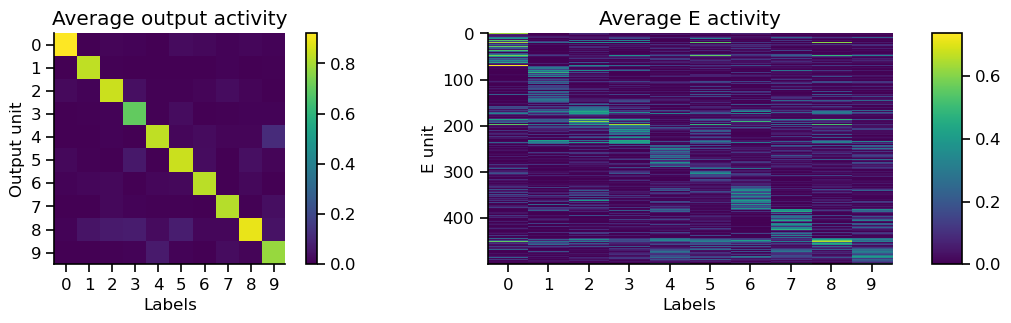

In [33]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}/epoch0_step10000.pt"
bp_network.load_state_dict(torch.load(saved_network_path))

pt.plot_batch_accuracy(bp_network, test_dataloader, population=bp_network.H1.E)

Directory already exists. Overwrite? (y/n)n
Model not exported


Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch accuracy = 95.01000213623047%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:557: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:203: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


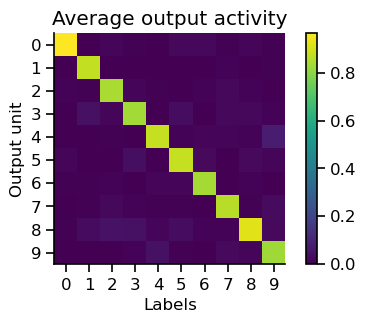

<Figure size 1000x300 with 0 Axes>

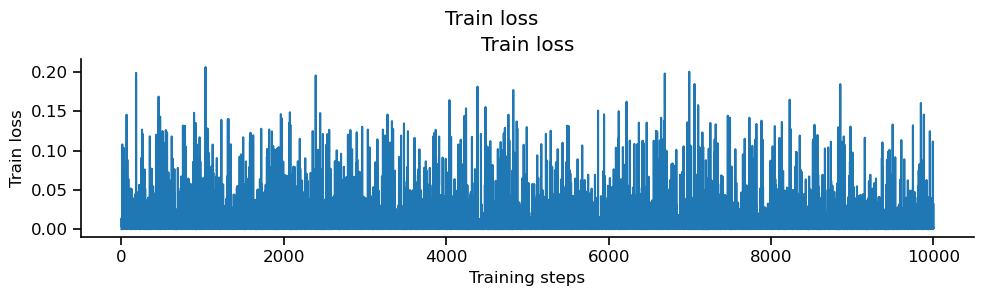

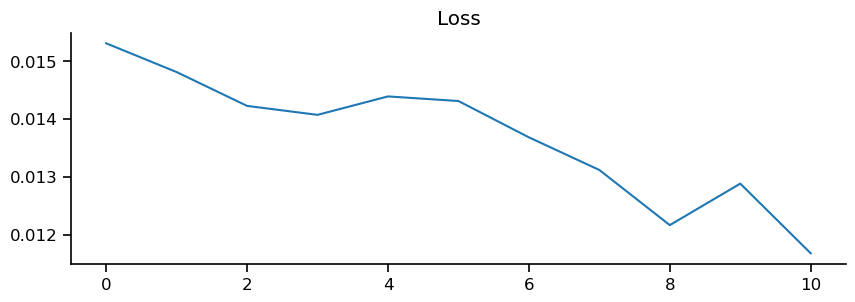

In [52]:
# Train network
data_generator.manual_seed(data_seed)
bp_network.train_and_validate(train_sub_dataloader, 
                              test_dataloader, 
                              epochs=epochs,
                              val_interval=(0,-1,1000),
                              store_history=True, 
                              store_weights=True,
                              export_weights_path=f"saved_networks/{network_name}",
                              status_bar=True)

pt.plot_batch_accuracy(bp_network, test_dataloader)
plt.figure()
pt.plot_train_loss_history(bp_network)
plt.title('Train loss')
plt.show()

# pt.plot_test_loss_history(bp_network, test_dataloader, stepsize=50)
# pt.plot_MNIST_examples(bp_network, test_dataloader)
plt.figure()
plt.plot(bp_network.val_loss_history)
plt.title('Loss')
plt.show()

In [96]:
# network = bp_network

# import pickle
# import datetime

# filename = "saved_networks/datetime.datetime.now().strftime('%Y%m%d_%H%M%S')"

# def save(self, filename="saved_networks/datetime.datetime.now().strftime('%Y%m%d_%H%M%S')"):
    
#     params_to_save = ['param_history', 'sample_order', 'sorted_sample_indexes', 'loss_history', 
#                       'val_output_history', 'val_loss_history', 'val_accuracy_history', 'val_target', 
#                       'activity_history_list', 'bias_history_list', 'plateau_history_list']

#     data_dict = {'network': {param_name:value for param_name,value in network.__dict__.items() 
#                              if param_name in params_to_save},
#                  'layers': {},
#                  'populations': {}}

#     for layer in network:        
#         layer_data = {param_name:value for param_name,value in layer.__dict__.items() 
#                       if param_name in params_to_save}        
#         data_dict['layers'][layer.name] = layer_data

#         for population in layer:        
#             population_data = {param_name:value for param_name,value in population.__dict__.items() 
#                                if param_name in params_to_save}
#             data_dict['populations'][population.fullname] = population_data

#     with open(f'{filename}.pickle', 'wb') as file:
#         pickle.dump(data_dict, file, protocol=pickle.HIGHEST_PROTOCOL)



In [97]:
# # Load network
# import EIANN.utils as utils

# def load(self, filename):
#     with open(f'{filename}.pickle', 'rb') as file:
#         data_dict = pickle.load(file)


#     network_data = data_dict['network']
#     network.__dict__.update(network_data)

#     for layer in network:
#         layer_data = data_dict['layers'][layer.name]
#         layer.__dict__.update(layer_data)

#         for population in layer:
#             population_data = data_dict['populations'][population.fullname]
#             population.__dict__.update(population_data)  


Computing tuning strength...
Generating plots...
W max = 0.07297822833061218, W min = -0.07880624383687973


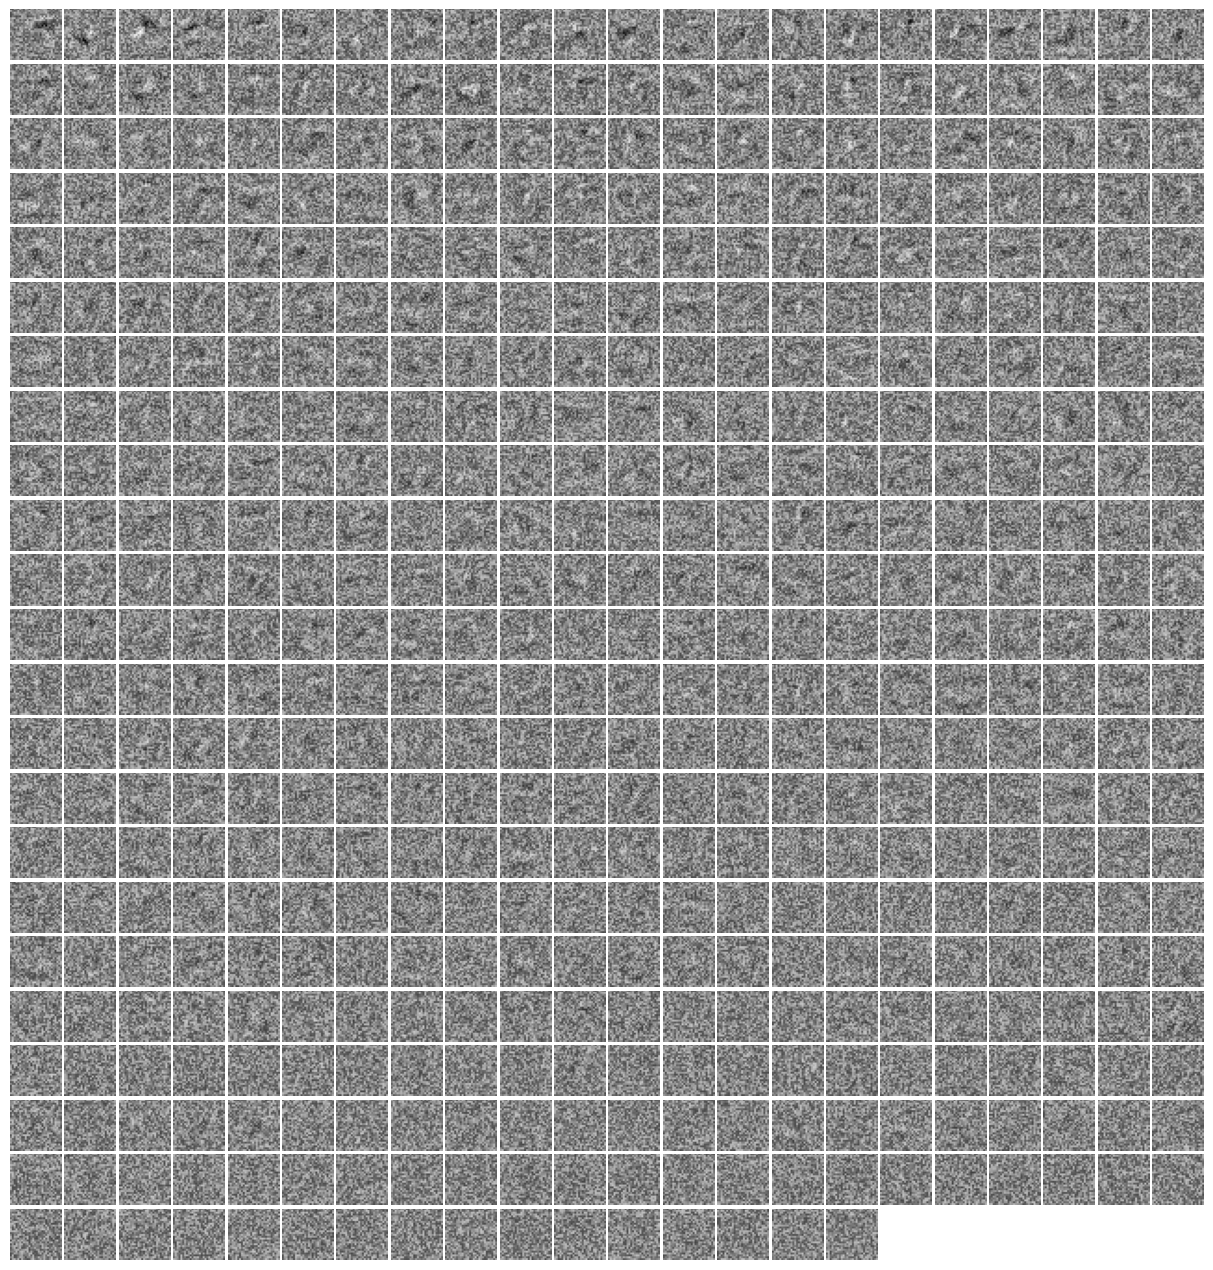

In [34]:
pt.plot_hidden_weights(bp_network.module_dict['H1E_InputE'].weight, sort=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

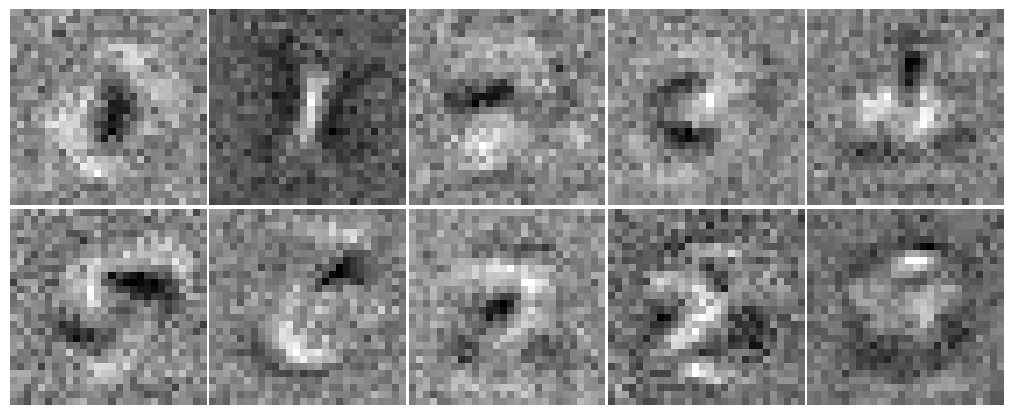

In [6]:
pt.plot_receptive_fields(bp_network.Output.E, test_dataloader)

# Backprop Dale network

In [2]:
# Create network
# network_name = "EIANN_1_hidden_mnist_backprop_Dale_relu_SGD_config"
# network_config = ut.read_from_yaml(f'../config/MNIST/{network_name}.yaml')

network_name = "20230102_EIANN_1_hidden_mnist_bpDale_softplus_config"
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

bpDale_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Batch accuracy = 91.41000366210938%


/Users/ag1880/Github_repos/Milstein-Lab/EIANN/EIANN/plot.py:557: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


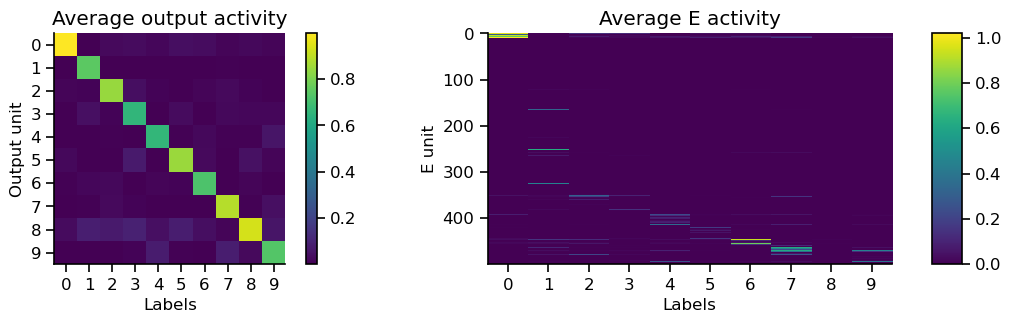

In [3]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}/epoch0_step10000.pt"
bpDale_network.load_state_dict(torch.load(saved_network_path))

pt.plot_batch_accuracy(bpDale_network, test_dataloader, population=bpDale_network.H1.E)

In [4]:
# # Train network
# data_generator.manual_seed(data_seed)
# bpDale_network.train_and_validate(train_sub_dataloader, 
#                               test_dataloader, 
#                               epochs=epochs,
#                               val_interval=(-1,-1,1000),
#                               store_history=True, 
#                               store_weights=False,
#                               export_weights_path=f"saved_networks/{network_name}",    
#                               status_bar=True)

# pt.plot_batch_accuracy(bpDale_network, test_dataloader)
# plt.figure()
# pt.plot_train_loss_history(bpDale_network)
# plt.title('Train loss')
# plt.show()

Wmax = tensor([0.2486, 0.3642, 0.3772, 0.4281, 0.4049, 0.5281, 0.2966, 0.4068, 0.3315,
        0.5018])


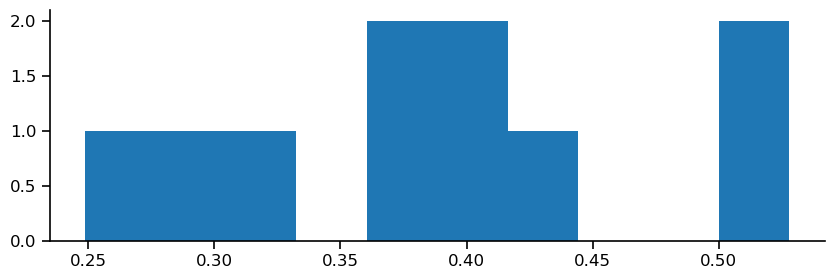

In [31]:
val,idx = torch.max(bpDale_network.module_dict['OutputE_H1E'].weight, dim=1)
print(f"Wmax = {val.detach()}")

plt.hist(val.detach(),10)
plt.show()



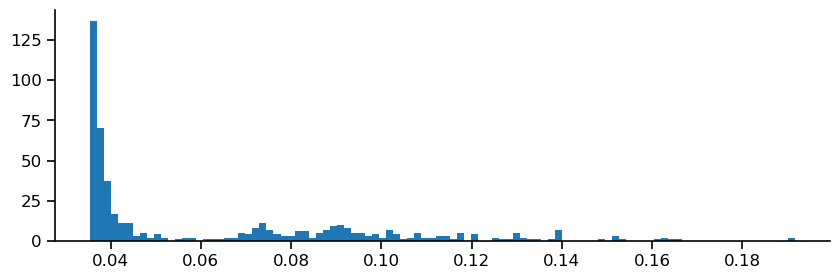

In [13]:
val,idx = torch.max(bpDale_network.module_dict['H1E_InputE'].weight, dim=1)

plt.hist(val.detach(),100)
plt.show()

Computing tuning strength...
Generating plots...
W max = 0.19167248904705048, W min = 0.0


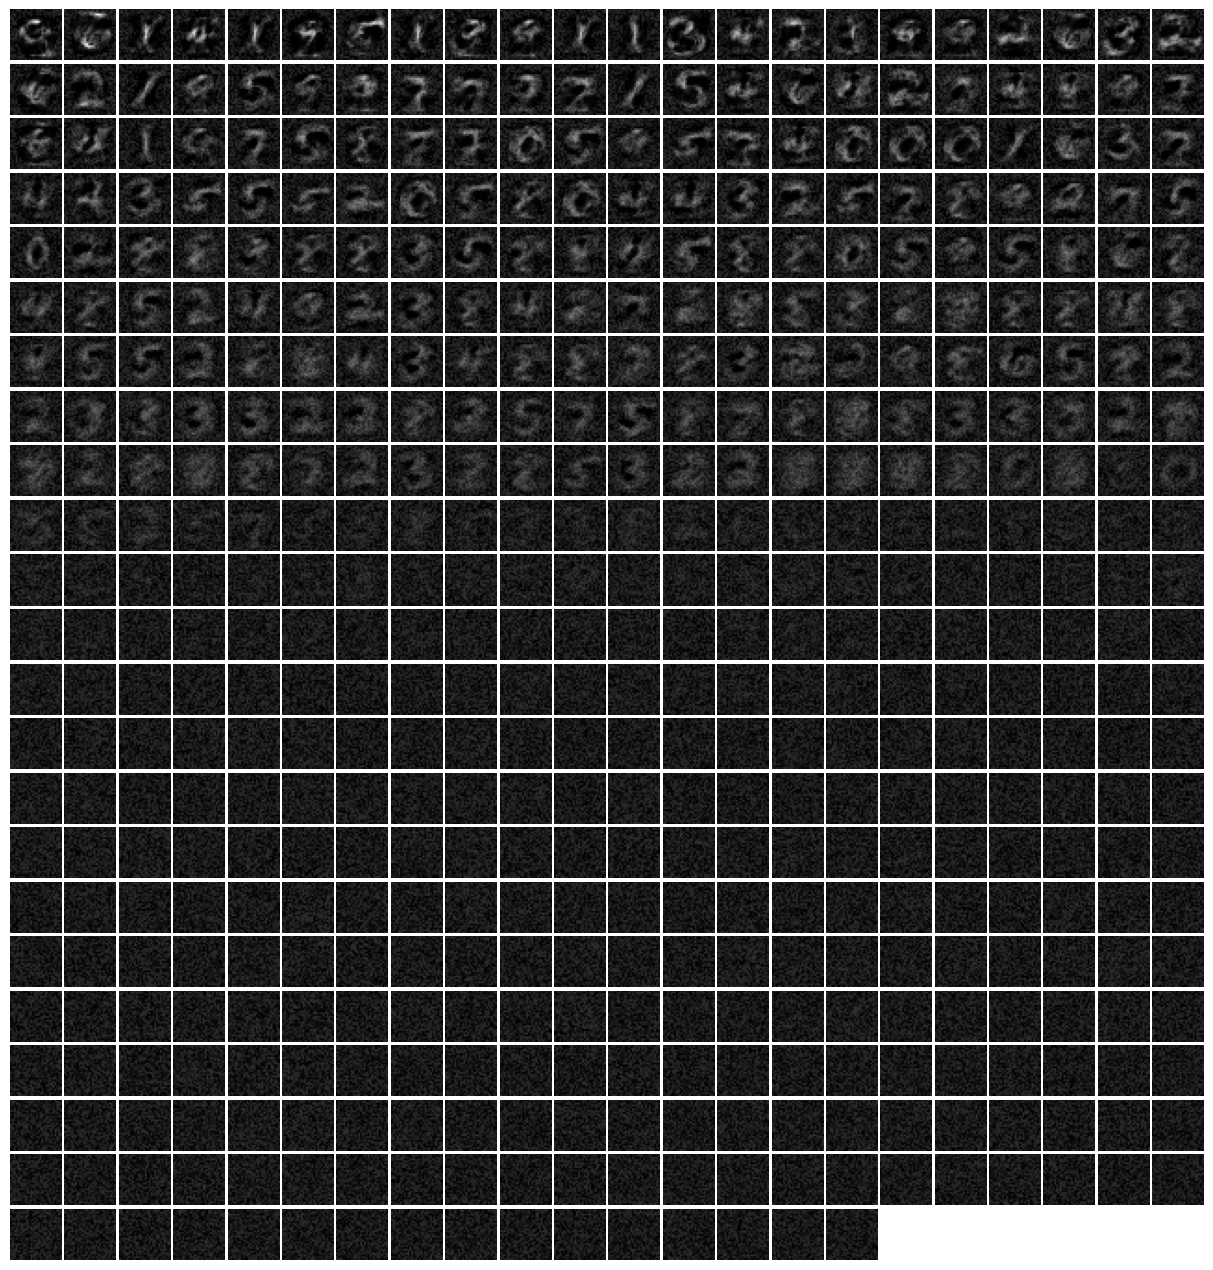

In [5]:
pt.plot_hidden_weights(bpDale_network.module_dict['H1E_InputE'].weight, sort=True)

In [11]:
# pt.plot_receptive_fields(bpDale_network.Output.E, test_dataloader)

# Gjorgjieva Hebb network

In [35]:
# Create network
network_name = "20230103_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config_B"
# network_config = ut.read_from_yaml('../optimize/data/20221229_EIANN_1_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
# network_config = ut.read_from_yaml('../config/MNIST/EIANN_0_hidden_mnist_Gjorgjieva_Hebb_config.yaml')
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

gj_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Batch accuracy = 8.199999809265137%


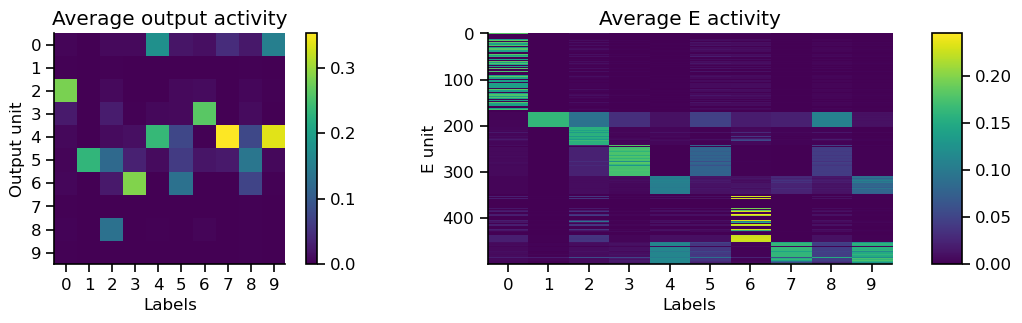

In [36]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}/epoch0_step10000.pt"
gj_network.load_state_dict(torch.load(saved_network_path))

pt.plot_batch_accuracy(gj_network, test_dataloader, population=gj_network.H1.E)

In [37]:
# # Train network
# data_generator.manual_seed(data_seed)
# gj_network.train_and_validate(train_sub_dataloader, 
#                               test_dataloader, 
#                               epochs=epochs,
#                               val_interval=(0,-1,1000),
#                               store_history=True, 
#                               store_weights=False, 
#                               export_weights_path=f"saved_networks/{network_name}",
#                               status_bar=True)

# pt.plot_batch_accuracy(gj_network, test_dataloader)
# plt.figure()
# pt.plot_train_loss_history(gj_network)
# plt.title('Train loss')
# plt.show()

Computing tuning strength...
Generating plots...
W max = 0.032757047563791275, W min = 5.465064010866787e-44


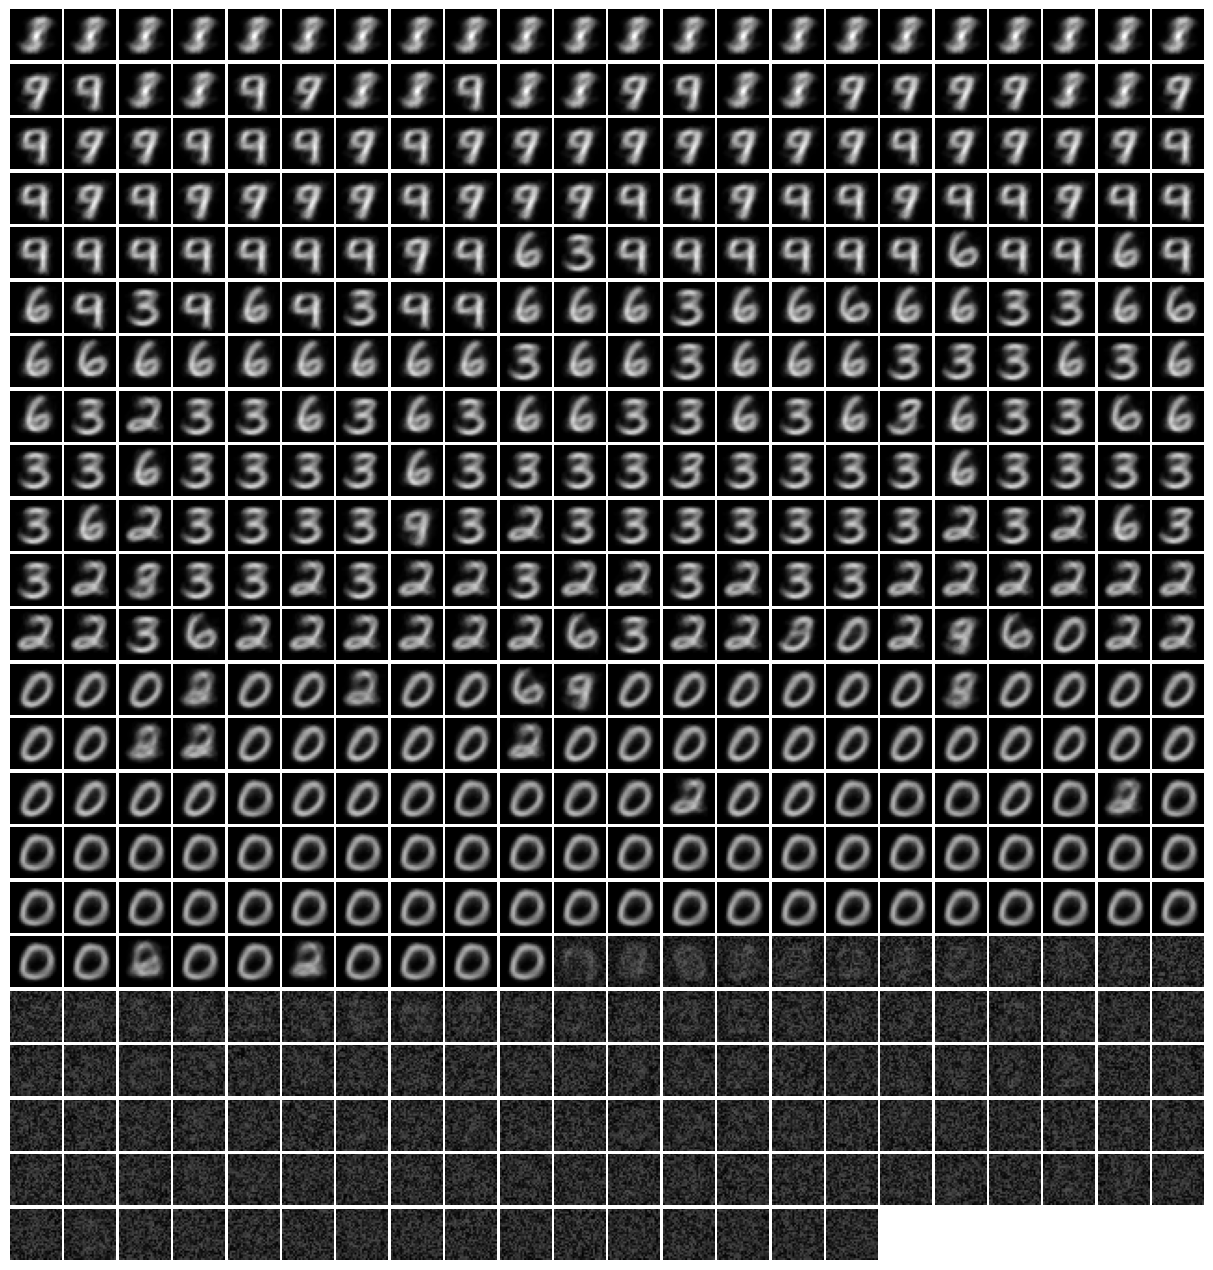

In [38]:
pt.plot_hidden_weights(gj_network.module_dict['H1E_InputE'].weight, sort=True)

In [7]:
# pt.plot_receptive_fields(gj_network.H1.FBI, test_dataloader)

In [8]:
# pt.plot_receptive_fields(gj_network.Output.E, test_dataloader)

In [9]:
# pt.plot_receptive_fields(gj_network.Output.FBI, test_dataloader)

# BTSP network

In [39]:
# Create network
network_name = "20221227_EIANN_1_hidden_mnist_BTSP_config_E"
network_config = ut.read_from_yaml(f'../optimize/data/{network_name}.yaml')

layer_config = network_config['layer_config']
projection_config = network_config['projection_config']
training_kwargs = network_config['training_kwargs']

btsp_network = Network(layer_config, projection_config, seed=network_seed, **training_kwargs)

Batch accuracy = 79.87000274658203%


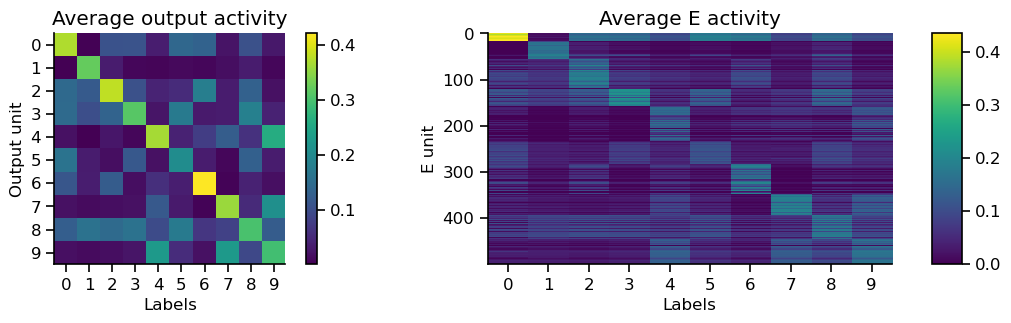

In [40]:
# Load pretrained network
saved_network_path = f"saved_networks/{network_name}/epoch0_step10000.pt"
btsp_network.load_state_dict(torch.load(saved_network_path))

pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)

In [41]:
# # Train network
# data_generator.manual_seed(data_seed)
# btsp_network.train_and_validate(train_sub_dataloader, 
#                                 test_dataloader, 
#                                 epochs=epochs,
#                                 val_interval=(0,-1,1000),
#                                 store_history=False, 
#                                 store_weights=False, 
#                                 export_weights_path=f"saved_networks/{network_name}",
#                                 status_bar=True)

# pt.plot_batch_accuracy(btsp_network, test_dataloader, population=btsp_network.H1.E)
# plt.figure()
# pt.plot_train_loss_history(btsp_network)
# plt.title('Train loss')
# plt.show()

Computing tuning strength...
Generating plots...
W max = 0.014020126312971115, W min = 9.252944188631318e-09


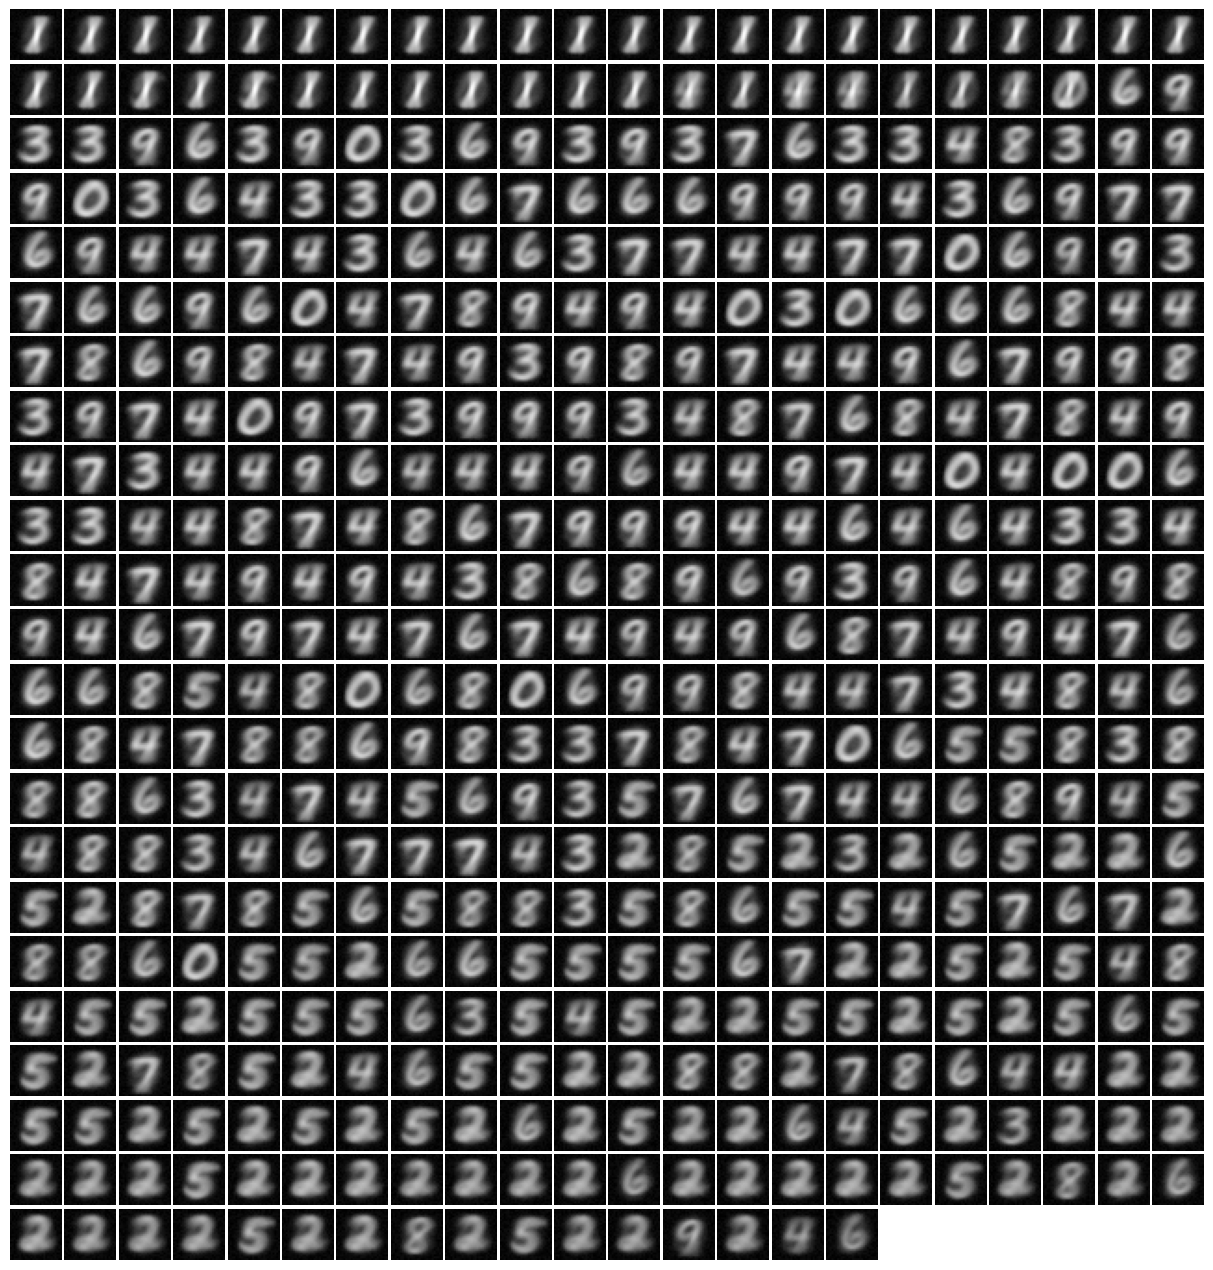

In [42]:
pt.plot_hidden_weights(btsp_network.module_dict['H1E_InputE'].weight, sort=True)

In [13]:
# pt.plot_receptive_fields(btsp_network.Output.E, test_dataloader)